In [1]:
import os
import sys
pdir = os.path.dirname(os.getcwd())
sys.path.append(pdir)

import numpy as np
import torch
import pandas as pd
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

import utils
from simpleview_pytorch import SimpleView

In [9]:
cloud = utils.pc_from_txt("../data/treesXYZ/alt01_24.txt")
cloud = utils.center_and_scale(cloud)

CPU times: user 1min 33s, sys: 475 ms, total: 1min 34s
Wall time: 1min 20s


(<Figure size 2160x360 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

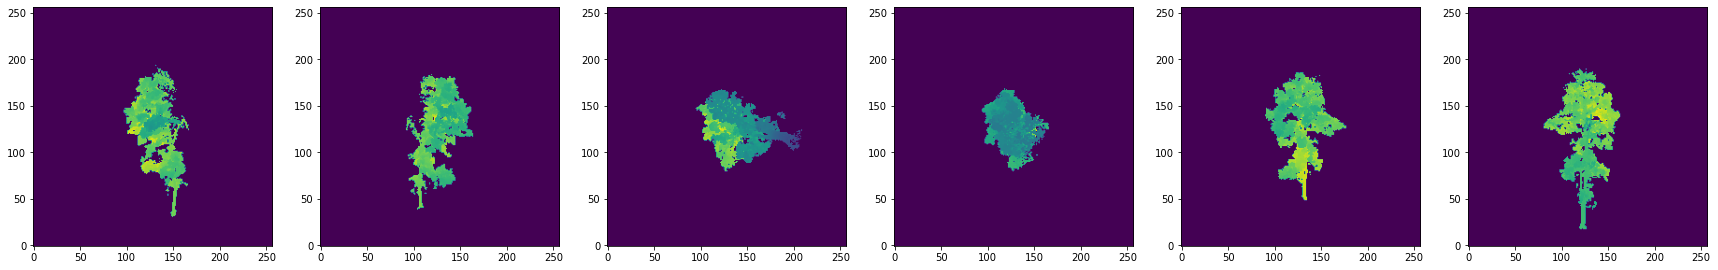

In [10]:
%%time
sample_images = utils.get_depth_images_from_cloud(cloud, image_dim=256, use_hard_min=True)
utils.plot_depth_images(sample_images)

CPU times: user 875 ms, sys: 3.64 ms, total: 879 ms
Wall time: 73.3 ms


(<Figure size 2160x360 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

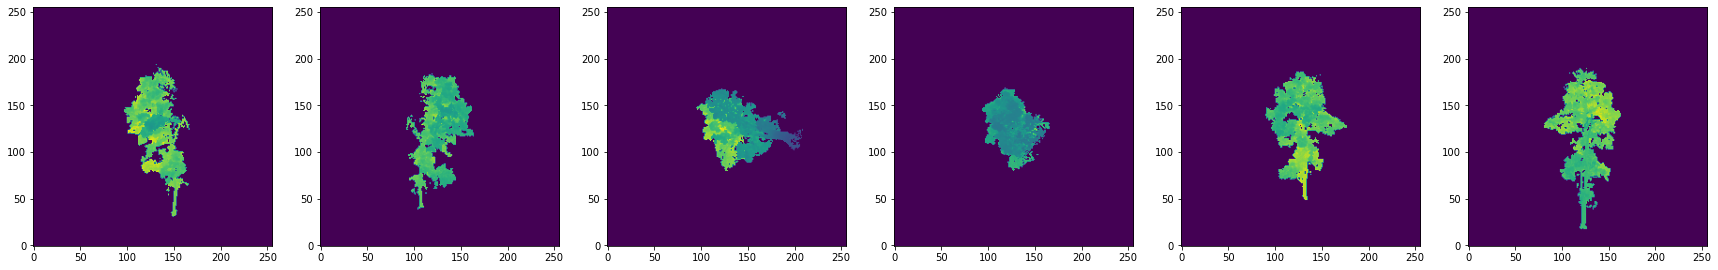

In [11]:
%%time
sample_images = utils.get_depth_images_from_cloud(cloud, image_dim=256, use_hard_min=False)
utils.plot_depth_images(sample_images)

In [3]:
%%time
metadata_file = "../data/treesXYZ/meta/META.csv"
data_dir = "../data/treesXYZ/"

image_dim=256
trees_dataset = utils.TreeSpeciesDataset(data_dir=data_dir, 
                                         metadata_file=metadata_file,
                                         )
trees_dataset.build_depth_images(image_dim=256)

torch.save(trees_dataset, 'trees_{}.pt'.format(image_dim))

  0%|          | 0/2485 [00:00<?, ?it/s]

alt28_154.txt


  0%|          | 1/2485 [00:01<59:52,  1.45s/it]

alt17_17.txt


  0%|          | 2/2485 [00:03<1:17:07,  1.86s/it]

alt25_26.txt


  0%|          | 3/2485 [00:04<50:51,  1.23s/it]  

alt09_69.txt


  0%|          | 5/2485 [00:04<26:41,  1.55it/s]

alt13_31.txt
alt12_15.txt


  0%|          | 6/2485 [00:06<38:09,  1.08it/s]

alt06_16.txt


  0%|          | 8/2485 [00:10<58:10,  1.41s/it]  

alt34_29.txt
alt01_61.txt


  0%|          | 9/2485 [00:10<45:09,  1.09s/it]

cue03_20.txt


  0%|          | 10/2485 [00:13<1:10:07,  1.70s/it]

alt35_10.txt


  0%|          | 11/2485 [00:17<1:34:30,  2.29s/it]

alt17_11.txt


  0%|          | 12/2485 [00:17<1:09:55,  1.70s/it]

alt12_33.txt


  1%|          | 13/2485 [00:19<1:08:32,  1.66s/it]

alt19_17.txt


  1%|          | 14/2485 [00:25<2:08:21,  3.12s/it]

alt36_26.txt


  1%|          | 14/2485 [00:26<1:17:47,  1.89s/it]


RuntimeError: found negative index -17 for dim 1

In [4]:
x = torch.load('trees_new.pt')

(<Figure size 2160x360 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

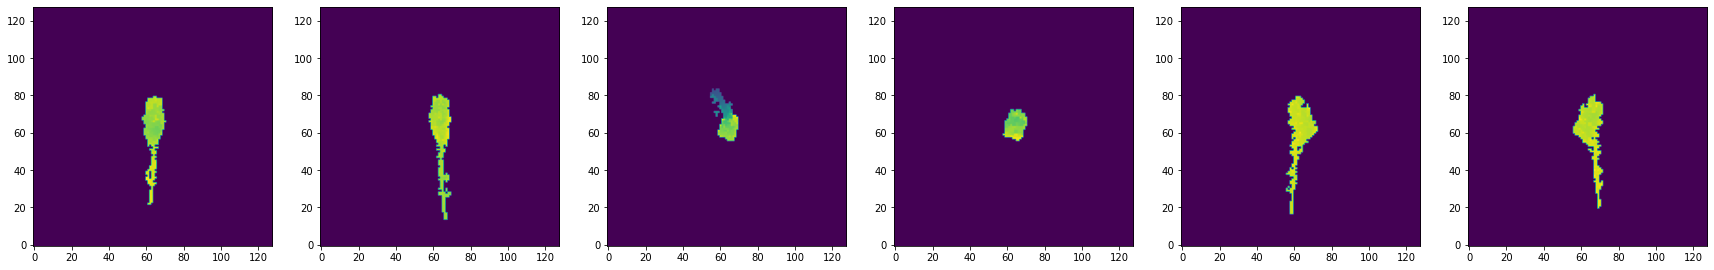

In [5]:
utils.plot_depth_images(x.depth_images[891])

In [4]:
torch.tensor([[0, 2], [1, 0], [1, 2]]).shape

torch.Size([3, 2])